**Created by Berkay Alan**

**Model Deployment with Joblib**

**25 January 2022**

**For more Tutorial:** https://github.com/berkayalan

## Joblib Library

Joblib is a set of tools to provide lightweight pipelining in Python. In particular:

transparent disk-caching of functions and lazy re-evaluation (memoize pattern)
easy simple parallel computing
Joblib is optimized to be fast and robust on large data in particular and has specific optimizations for numpy arrays. It is BSD-licensed.

Check it out :https://joblib.readthedocs.io/en/latest/

So we will create a Multilayer Perceptron classifier model in this tutorial and save it in order to use it in the future.

## Importing Libraries

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,scale, RobustScaler
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score,roc_curve, classification_report,mean_squared_error,f1_score,recall_score,precision_score
import time
import joblib
from skompiler import skompile

In order to see all rows and columns, we will increase max display numbers of dataframe.

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Artificial Neural Networks(ANN) Model

For a real world example, we will work with **Pima Indians Diabetes** dataset by UCI Machine Learning as before.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

We will try to predict whether the patient has diabetes or not.

In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

In [10]:
X.shape

(768, 8)

In [11]:
y.shape

(768,)

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [12]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


First we'll scale our data.

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled[:10]

array([[ 0.64896283,  0.85394206,  0.17154252,  0.90309831, -0.68327145,
         0.21175498,  0.43304279,  1.41559569],
       [-0.83948403, -1.0767362 , -0.13862979,  0.52789301, -0.68327145,
        -0.66292137, -0.38594131, -0.19287544],
       [ 1.24434157,  1.92654109, -0.24202057, -1.28559926, -0.68327145,
        -1.07526879,  0.56657281, -0.10821907],
       [-0.83948403, -0.95415345, -0.13862979,  0.15268771,  0.12433401,
        -0.47549072, -0.93193072, -1.0394392 ],
       [-1.1371734 ,  0.5168395 , -1.48270984,  0.90309831,  0.76010853,
         1.39881574,  5.36178409, -0.02356269],
       [ 0.35127346, -0.12671991,  0.2749333 , -1.28559926, -0.68327145,
        -0.78787514, -0.83104137, -0.27753182],
       [-0.24410528, -1.291256  , -0.96575598,  0.71549566,  0.07278473,
        -0.11312481, -0.69157669, -0.61615732],
       [ 1.83972032, -0.1573656 , -3.55052529, -1.28559926, -0.68327145,
         0.42417638, -1.02985273, -0.36218819],
       [-0.54179466,  2.3555807 

In [16]:
multilayer_ann = MLPClassifier()

In [17]:
multilayer_ann.fit(X_train_scaled,y_train)

MLPClassifier()

In [19]:
# Coefficients
multilayer_ann.coefs_[1][:10]

array([[ 0.40082676],
       [-0.2749977 ],
       [ 0.06445968],
       [ 0.18937356],
       [ 0.33964802],
       [ 0.24839256],
       [ 0.02950266],
       [-0.29852593],
       [-0.01474444],
       [-0.14553835]])

In [20]:
#get activation function
multilayer_ann.activation

'relu'

In [21]:
#get alpha
multilayer_ann.alpha

0.0001

In [22]:
#get batch size
multilayer_ann.batch_size

'auto'

In [23]:
multilayer_ann.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## Prediction

In [24]:
multilayer_ann

MLPClassifier()

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [25]:
y_pred = multilayer_ann.predict(X_test_scaled)

In [26]:
cm = confusion_matrix(y_test,y_pred)

In [27]:
cm

array([[97, 11],
       [23, 37]])

In [28]:
print("Our Accuracy is: ", (94+39)/(94+21+14+39))

Our Accuracy is:  0.7916666666666666


In [29]:
accuracy_score(y_test,y_pred)

0.7976190476190477

In [30]:
recall_score(y_test,y_pred)

0.6166666666666667

In [31]:
precision_score(y_test,y_pred)

0.7708333333333334

In [32]:
f1_score(y_test,y_pred)

0.6851851851851851

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       108
           1       0.77      0.62      0.69        60

    accuracy                           0.80       168
   macro avg       0.79      0.76      0.77       168
weighted avg       0.79      0.80      0.79       168



## Model Tuning & Validation

In [34]:
multilayer_ann

MLPClassifier()

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [35]:
accuracies= cross_val_score(estimator=multilayer_ann,
                            X=X_train_scaled,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 76.00 %
Standart Deviation of Accuracies: 6.16 %


In [36]:
multilayer_ann.predict(X_test_scaled)[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

As you can see *predict()* function gives us directly classes. If we want to get probabilites of each classes, we can use **predict_proba()** function. We can also give manual treshold to classify.

In [37]:
results =pd.DataFrame(multilayer_ann.predict_proba(X_test_scaled)[:10],
             columns=["Possibility of 0","Possibility of 1"])

results["Class"]=[1 if i>0.5 else 0 for i in results["Possibility of 1"]]

In [38]:
results.head()

,Possibility of 0,Possibility of 1,Class
0,0.936376,0.063624,0
1,0.925826,0.074174,0
2,0.899721,0.100279,0
3,0.385156,0.614844,1
4,0.061386,0.938614,1


Now we will tune our model with GridSearch.

In [39]:
ann_params ={"hidden_layer_sizes":[(100,100,10),
                                   (100,10,10),
                                   (100,100,100),
                                   (50,50,100),
                                   (3,3,5),
                                   (2,7)],
             "solver":["lbfgs","sgd", "adam"],
             "alpha": [0.0001,0.001,0.01,0.01,0.25,0.00001],
             "activation": ["relu","logistic"]}

All hyperparameters for MLP Classifier can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

In [40]:
multilayer_ann = MLPClassifier()
multilayer_ann_cv = GridSearchCV(multilayer_ann,ann_params,cv=8,
                                 n_jobs=-1 , verbose=2)

In [50]:
start_time = time.time()

multilayer_ann_cv.fit(X_train_scaled,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for multilayer_ann_cv cross validation: "
      f"{elapsed_time:.3f} seconds")

Fitting 8 folds for each of 216 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:  3.2min finished


Elapsed time for multilayer_ann_cv cross validation: 192.394 seconds


In [51]:
#best score
multilayer_ann_cv.best_score_

0.7816666666666667

In [52]:
#best parameters
multilayer_ann_cv.best_params_

{'activation': 'logistic',
 'alpha': 1e-05,
 'hidden_layer_sizes': (100, 10, 10),
 'solver': 'adam'}

In [53]:
ann_tuned = MLPClassifier(hidden_layer_sizes = (100, 10, 10),
                          solver = "adam",
                          alpha = 1e-05,
                          activation = "logistic" ).fit(X_train_scaled,y_train)

In [54]:
ann_tuned

MLPClassifier(activation='logistic', alpha=1e-05,
              hidden_layer_sizes=(100, 10, 10))

In [55]:
y_pred = ann_tuned.predict(X_test_scaled)

In [56]:
cm = confusion_matrix(y_test,y_pred)

In [57]:
cm

array([[94, 14],
       [26, 34]])

In [58]:
print("Our Accuracy is: ", (94+28)/(94+28+32+14))

Our Accuracy is:  0.7261904761904762


In [59]:
accuracy_score(y_test,y_pred)

0.7619047619047619

In [60]:
recall_score(y_test,y_pred)

0.5666666666666667

In [61]:
precision_score(y_test,y_pred)

0.7083333333333334

In [62]:
f1_score(y_test,y_pred)

0.6296296296296297

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       108
           1       0.71      0.57      0.63        60

    accuracy                           0.76       168
   macro avg       0.75      0.72      0.73       168
weighted avg       0.76      0.76      0.75       168



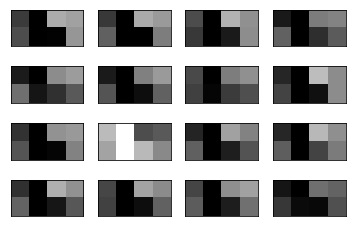

In [68]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = ann_tuned.coefs_[0].min(), ann_tuned.coefs_[0].max()

for coef, ax in zip(ann_tuned.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(2, 4), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

## Saving Model as pickle file

Now we will save our final model as a pickle file.

In [41]:
ann_final = MLPClassifier(hidden_layer_sizes = (100, 10, 10),
                          solver = "adam",
                          alpha = 1e-05,
                          activation = "logistic" ).fit(X_train_scaled,y_train)

In [42]:
joblib.dump(ann_final,'ann_final_model.pkl')

['ann_final_model.pkl']

In [43]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [44]:
list(X.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [45]:
joblib.dump(list(X.columns),'column_names.pkl')

['column_names.pkl']

## Loading Model

Now we will check if our model is saved as pickle(pkl) file.

In [46]:
colunm_names = joblib.load('column_names.pkl')

In [47]:
colunm_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [48]:
loaded_ann_model = joblib.load('ann_final_model.pkl')

In [51]:
loaded_ann_model.predict([[-0.83948403, -0.37188541,  0.9986687 , -0.09744915, -0.68327145,
                           -0.60044449, -0.24054196, -0.78547007]])

array([0])

In [54]:
loaded_ann_model.predict([X_test_scaled[0]])

array([0])

If you want to see other algorithms such as:

- Logistic Regression (Theory - Model- Tuning)

- Decision Tree Classification (Theory - Model- Tuning)

- Support Vector Machines(SVC) - Linear Kernel (Theory - Model- Tuning)

- Support Vector Machines(SVC) - Radial Basis Kernel (Theory - Model- Tuning)

- Ensemble Learning - Random Forests Classification (Theory - Model- Tuning)

- Naive Bayes Classification (Theory - Model)

- XGBoost(Extreme Gradient Boosting) Classification (Theory - Model- Tuning)

Please visit my [Classification tutorial](https://github.com/berkayalan/Data-Science-Tutorials/blob/master/Classification/Classification.ipynb)